### Import libraries and data
First we start with import of the necessary libraries.

In [1]:
import os
os.chdir('.')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
from scipy import stats
import json #for dict to string conversion
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set_theme(style='whitegrid')
#tweaking with some default pandas options
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

### Load data set and check basics
Next we load the dataset and we briefly check it.

In [2]:
df = pd.read_csv('./data.csv.zip', compression='zip', sep=';', header=None)
df.head()

0      1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29   ...   652   653   654   655   656   657   658   659   660   661   662   663   664   665   666   667   668   669   670   671   672   673   674   675   676   677   678   679   680   681
0    1 12.740 0.597 0.596 0.594 0.591 0.587 0.583 0.579 0.572 0.566 0.560 0.552 0.544 0.537 0.528 0.521 0.512 0.505 0.498 0.490 0.483 0.478 0.470 0.465 0.459 0.454 0.450 0.444 0.440  ... 0.134 0.134 0.133 0.133 0.132 0.131 0.131 0.130 0.129 0.129 0.128 0.127 0.126 0.125 0.125 0.124 0.123 0.122 0.121 0.120 0.120 0.119 0.118 0.118 0.117 0.116 0.116 0.115 0.115 0.115
1    2 35.721 0.954 0.953 0.952 0.950 0.948 0.946 0.944 0.941 0.938 0.934 0.931 0.928 0.925 0.922 0.919 0.916 0.913 0.910 0.907 0.903 0.899 0.895 0.891 0.887 0.882 0.878 0.874 0.870  ... 0.339 0.337 0.336 0.334 0.331 0.329 0.327 0.325 0.322 0.319 0.316 0.313 0.310 0.307 0.304 0.301 0.298 0.295 0.293 0.290 0.288 0.285 0.283 0.281 0.279 0.277 0.276 0.274 0.273 0.272
2    3 12.000 0.611 0.610 0.607 0.605 0.601 0.597 0.593 0.587 0.581 0.574 0.567 0.559 0.552 0.544 0.536 0.528 0.520 0.513 0.507 0.500 0.494 0.489 0.484 0.479 0.473 0.469 0.464 0.459  ... 0.128 0.128 0.127 0.127 0.126 0.126 0.125 0.125 0.124 0.123 0.123 0.122 0.121 0.121 0.120 0.120 0.119 0.118 0.118 0.117 0.116 0.116 0.115 0.114 0.114 0.113 0.113 0.112 0.112 0.111
3    4 13.845 0.343 0.344 0.345 0.346 0.347 0.347 0.348 0.349 0.349 0.350 0.350 0.351 0.351 0.351 0.351 0.351 0.350 0.350 0.349 0.348 0.348 0.347 0.347 0.347 0.347 0.348 0.348 0.349  ... 0.089 0.089 0.089 0.089 0.089 0.089 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.087 0.087 0.086 0.086 0.085 0.085 0.085 0.084 0.084 0.084 0.084 0.084 0.084 0.084 0.084 0.084
4    5 19.300 0.761 0.761 0.761 0.761 0.761 0.761 0.761 0.760 0.760 0.760 0.759 0.759 0.758 0.757 0.757 0.756 0.755 0.754 0.753 0.752 0.752 0.751 0.750 0.749 0.748 0.748 0.747 0.746  ... 0.351 0.350 0.348 0.347 0.345 0.343 0.341 0.339 0.337 0.335 0.332 0.330 0.328 0.326 0.323 0.321 0.319 0.317 0.314 0.312 0.310 0.308 0.306 0.304 0.302 0.300 0.298 0.296 0.295 0.293

[5 rows x 682 columns]

In [3]:
df.describe()

0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       23       24       25       26       27       28       29   ...      652      653      654      655      656      657      658      659      660      661      662      663      664      665      666      667      668      669      670      671      672      673      674      675      676      677      678      679      680      681
count 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000  ... 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000 3908.000
mean  1954.500   31.247    0.674    0.673    0.672    0.671    0.670    0.668    0.666    0.664    0.662    0.659    0.656    0.653    0.650    0.647    0.644    0.641    0.637    0.634    0.630    0.627    0.624    0.620    0.617    0.614    0.612    0.609    0.607    0.605  ...    0.206    0.205    0.204    0.203    0.202    0.201    0.200    0.199    0.197    0.196    0.195    0.193    0.192    0.190    0.189    0.187    0.186    0.184    0.183    0.182    0.180    0.179    0.178    0.177    0.176    0.175    0.174    0.174    0.173    0.172
std   1128.287   20.044    0.177    0.177    0.176    0.176    0.175    0.175    0.174    0.174    0.173    0.173    0.172    0.172    0.172    0.172    0.172    0.172    0.172    0.172    0.172    0.172    0.172    0.172    0.172    0.171    0.171    0.171    0.170    0.170  ...    0.114    0.114    0.113    0.113    0.112    0.111    0.110    0.110    0.109    0.108    0.107    0.107    0.106    0.105    0.104    0.103    0.103    0.102    0.101    0.100    0.099    0.099    0.098    0.097    0.096    0.096    0.095    0.095    0.094    0.094
min      1.000    3.061    0.225    0.226    0.227    0.228    0.229    0.230    0.231    0.232    0.233    0.233    0.234    0.235    0.235    0.236    0.236    0.236    0.237    0.237    0.237    0.237    0.237    0.237    0.238    0.238    0.239    0.239    0.240    0.241  ...    0.033    0.033    0.033    0.032    0.032    0.032    0.032    0.032    0.032    0.032    0.032    0.032    0.032    0.032    0.032    0.031    0.031    0.031    0.031    0.031    0.031    0.031    0.031    0.031    0.031    0.031    0.031    0.031    0.030    0.030
25%    977.750   13.096    0.562    0.561    0.560    0.558    0.556    0.553    0.550    0.546    0.541    0.536    0.531    0.524    0.519    0.512    0.506    0.499    0.493    0.486    0.480    0.473    0.468    0.461    0.456    0.451    0.448    0.445    0.443    0.440  ...    0.111    0.111    0.111    0.110    0.110    0.109    0.109    0.108    0.108    0.107    0.106    0.106    0.105    0.104    0.104    0.103    0.102    0.102    0.101    0.100    0.100    0.099    0.099    0.098    0.098    0.098    0.097    0.097    0.097    0.097
50%   1954.500   22.770    0.715    0.715    0.714    0.714    0.712    0.711    0.708    0.706    0.703    0.700    0.696    0.694    0.690    0.688    0.685    0.682    0.679    0.676    0.673    0.670    0.667    0.664    0.661    0.657    0.655    0.651    0.649    0.647  ...    0.177    0.176    0.176    0.175    0.174    0.173    0.172    0.171    0.170    0.169    0.168    0.167    0.165    0.164    0.163    0.161    0.160    0.159    0.157    0.156    0.155    0.154    0.153    0.153    0.152    0.151    0.151    0.151    0.150    0.150
75%   2931.250   51.250    0.813    0.812    0.812    0.811    0.810    0.808    0.806    0.804    0.803    0.800    0.798    0.796    0.793    0.791    0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Columns: 682 entries, 0 to 681
dtypes: float64(681), int64(1)
memory usage: 20.3 MB


In [5]:
#check Nans by first summing over separate columns and then do sum from all columns.
df.isnull().sum().sum()

0

First we delete the labels feature (we are going to use default pandas index so we don't need labels), rename independent variables and we put the dependent variable to the end.

In [6]:
df.drop([0], axis=1, inplace=True)
dfy = df.pop(1)
df.rename(lambda x: 'x' + str(x-1), axis = 'columns', inplace = True)
df['y'] = dfy

In [7]:
df

x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11   x12   x13   x14   x15   x16   x17   x18   x19   x20   x21   x22   x23   x24   x25   x26   x27   x28   x29   x30  ...  x652  x653  x654  x655  x656  x657  x658  x659  x660  x661  x662  x663  x664  x665  x666  x667  x668  x669  x670  x671  x672  x673  x674  x675  x676  x677  x678  x679  x680      y
0    0.597 0.596 0.594 0.591 0.587 0.583 0.579 0.572 0.566 0.560 0.552 0.544 0.537 0.528 0.521 0.512 0.505 0.498 0.490 0.483 0.478 0.470 0.465 0.459 0.454 0.450 0.444 0.440 0.437 0.432  ... 0.134 0.133 0.133 0.132 0.131 0.131 0.130 0.129 0.129 0.128 0.127 0.126 0.125 0.125 0.124 0.123 0.122 0.121 0.120 0.120 0.119 0.118 0.118 0.117 0.116 0.116 0.115 0.115 0.115 12.740
1    0.954 0.953 0.952 0.950 0.948 0.946 0.944 0.941 0.938 0.934 0.931 0.928 0.925 0.922 0.919 0.916 0.913 0.910 0.907 0.903 0.899 0.895 0.891 0.887 0.882 0.878 0.874 0.870 0.866 0.863  ... 0.337 0.336 0.334 0.331 0.329 0.327 0.325 0.322 0.319 0.316 0.313 0.310 0.307 0.304 0.301 0.298 0.295 0.293 0.290 0.288 0.285 0.283 0.281 0.279 0.277 0.276 0.274 0.273 0.272 35.721
2    0.611 0.610 0.607 0.605 0.601 0.597 0.593 0.587 0.581 0.574 0.567 0.559 0.552 0.544 0.536 0.528 0.520 0.513 0.507 0.500 0.494 0.489 0.484 0.479 0.473 0.469 0.464 0.459 0.455 0.451  ... 0.128 0.127 0.127 0.126 0.126 0.125 0.125 0.124 0.123 0.123 0.122 0.121 0.121 0.120 0.120 0.119 0.118 0.118 0.117 0.116 0.116 0.115 0.114 0.114 0.113 0.113 0.112 0.112 0.111 12.000
3    0.343 0.344 0.345 0.346 0.347 0.347 0.348 0.349 0.349 0.350 0.350 0.351 0.351 0.351 0.351 0.351 0.350 0.350 0.349 0.348 0.348 0.347 0.347 0.347 0.347 0.348 0.348 0.349 0.349 0.349  ... 0.089 0.089 0.089 0.089 0.089 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.087 0.087 0.086 0.086 0.085 0.085 0.085 0.084 0.084 0.084 0.084 0.084 0.084 0.084 0.084 0.084 13.845
4    0.761 0.761 0.761 0.761 0.761 0.761 0.761 0.760 0.760 0.760 0.759 0.759 0.758 0.757 0.757 0.756 0.755 0.754 0.753 0.752 0.752 0.751 0.750 0.749 0.748 0.748 0.747 0.746 0.746 0.745  ... 0.350 0.348 0.347 0.345 0.343 0.341 0.339 0.337 0.335 0.332 0.330 0.328 0.326 0.323 0.321 0.319 0.317 0.314 0.312 0.310 0.308 0.306 0.304 0.302 0.300 0.298 0.296 0.295 0.293 19.300
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
3903 0.600 0.599 0.598 0.597 0.595 0.593 0.591 0.589 0.586 0.583 0.581 0.578 0.575 0.573 0.570 0.568 0.565 0.563 0.560 0.557 0.553 0.550 0.547 0.543 0.540 0.537 0.534 0.531 0.528 0.526  ... 0.112 0.111 0.111 0.110 0.109 0.109 0.108 0.107 0.106 0.105 0.104 0.103 0.101 0.100 0.099 0.098 0.097 0.096 0.095 0.095 0.094 0.093 0.093 0.092 0.092 0.092 0.092 0.092 0.092 69.165
3904 0.382 0.383 0.384 0.385 0.386 0.387 0.388 0.389 0.389 0.390 0.391 0.391 0.391 0.392 0.392 0.392 0.392 0.392 0.391 0.391 0.391 0.391 0.391 0.391 0.391 0.391 0.392 0.392 0.392 0.392  ... 0.135 0.135 0.134 0.134 0.134 0.134 0.133 0.133 0.132 0.132 0.132 0.131 0.130 0.129 0.128 0.128 0.127 0.126 0.125 0.124 0.124 0.123 0.123 0.122 0.122 0.121 0.121 0.121 0.121 21.453
3905 0.701 0.701 0.701 0.701 0.701 0.701 0.701 0.701 0.700 0.700 0.700 0.700 0.699 0.699 0.698 0.698 0.697 0.697 0.696 0.695 0.694 0.694 0.693 0.692 0.692 0.691 0.691 0.690 0.689 0.689  ... 0.335 0.334 0.333 0.331 0.329 0.327 0.325 0.323 0.321 0.319 0.317 0.315 0.313 0.310 0.308 0.306 0.304 0.302 0.299 0.297 0.295 0.293 0.291 0.289 0.287 0.286 0.284 0.283 0.281 15.000
3906 0.544 0.542 0.540 0.537 0.534 0.530 0.525 0.520 0.515 0.509 0.503 0.497 0.490 0.483 0.476 0.469 0.462 0.454 0.446 0.439 0.432 0.426 0.421 0.416 0.412 0.408 0.405 0.401 0.398 0.394  ... 0.061 0.061 0.060 0.060 0.060 0.060 0.059 0.059 0.059 0.058 0.058 0.057 0.057 0.057 0.056 0.056 0.055 0.055 

Independent data is mostly in a range from 0-1, which probably corresponds to observed transmittance/intensity for different wavelengths. There is 680 column and red light has a wavelangth = 680 nm, so each column could correspond to observations coming from a different length of a red light.  
Let's first plot each of the samples to visually inspect them.
### Exploratory data analysis

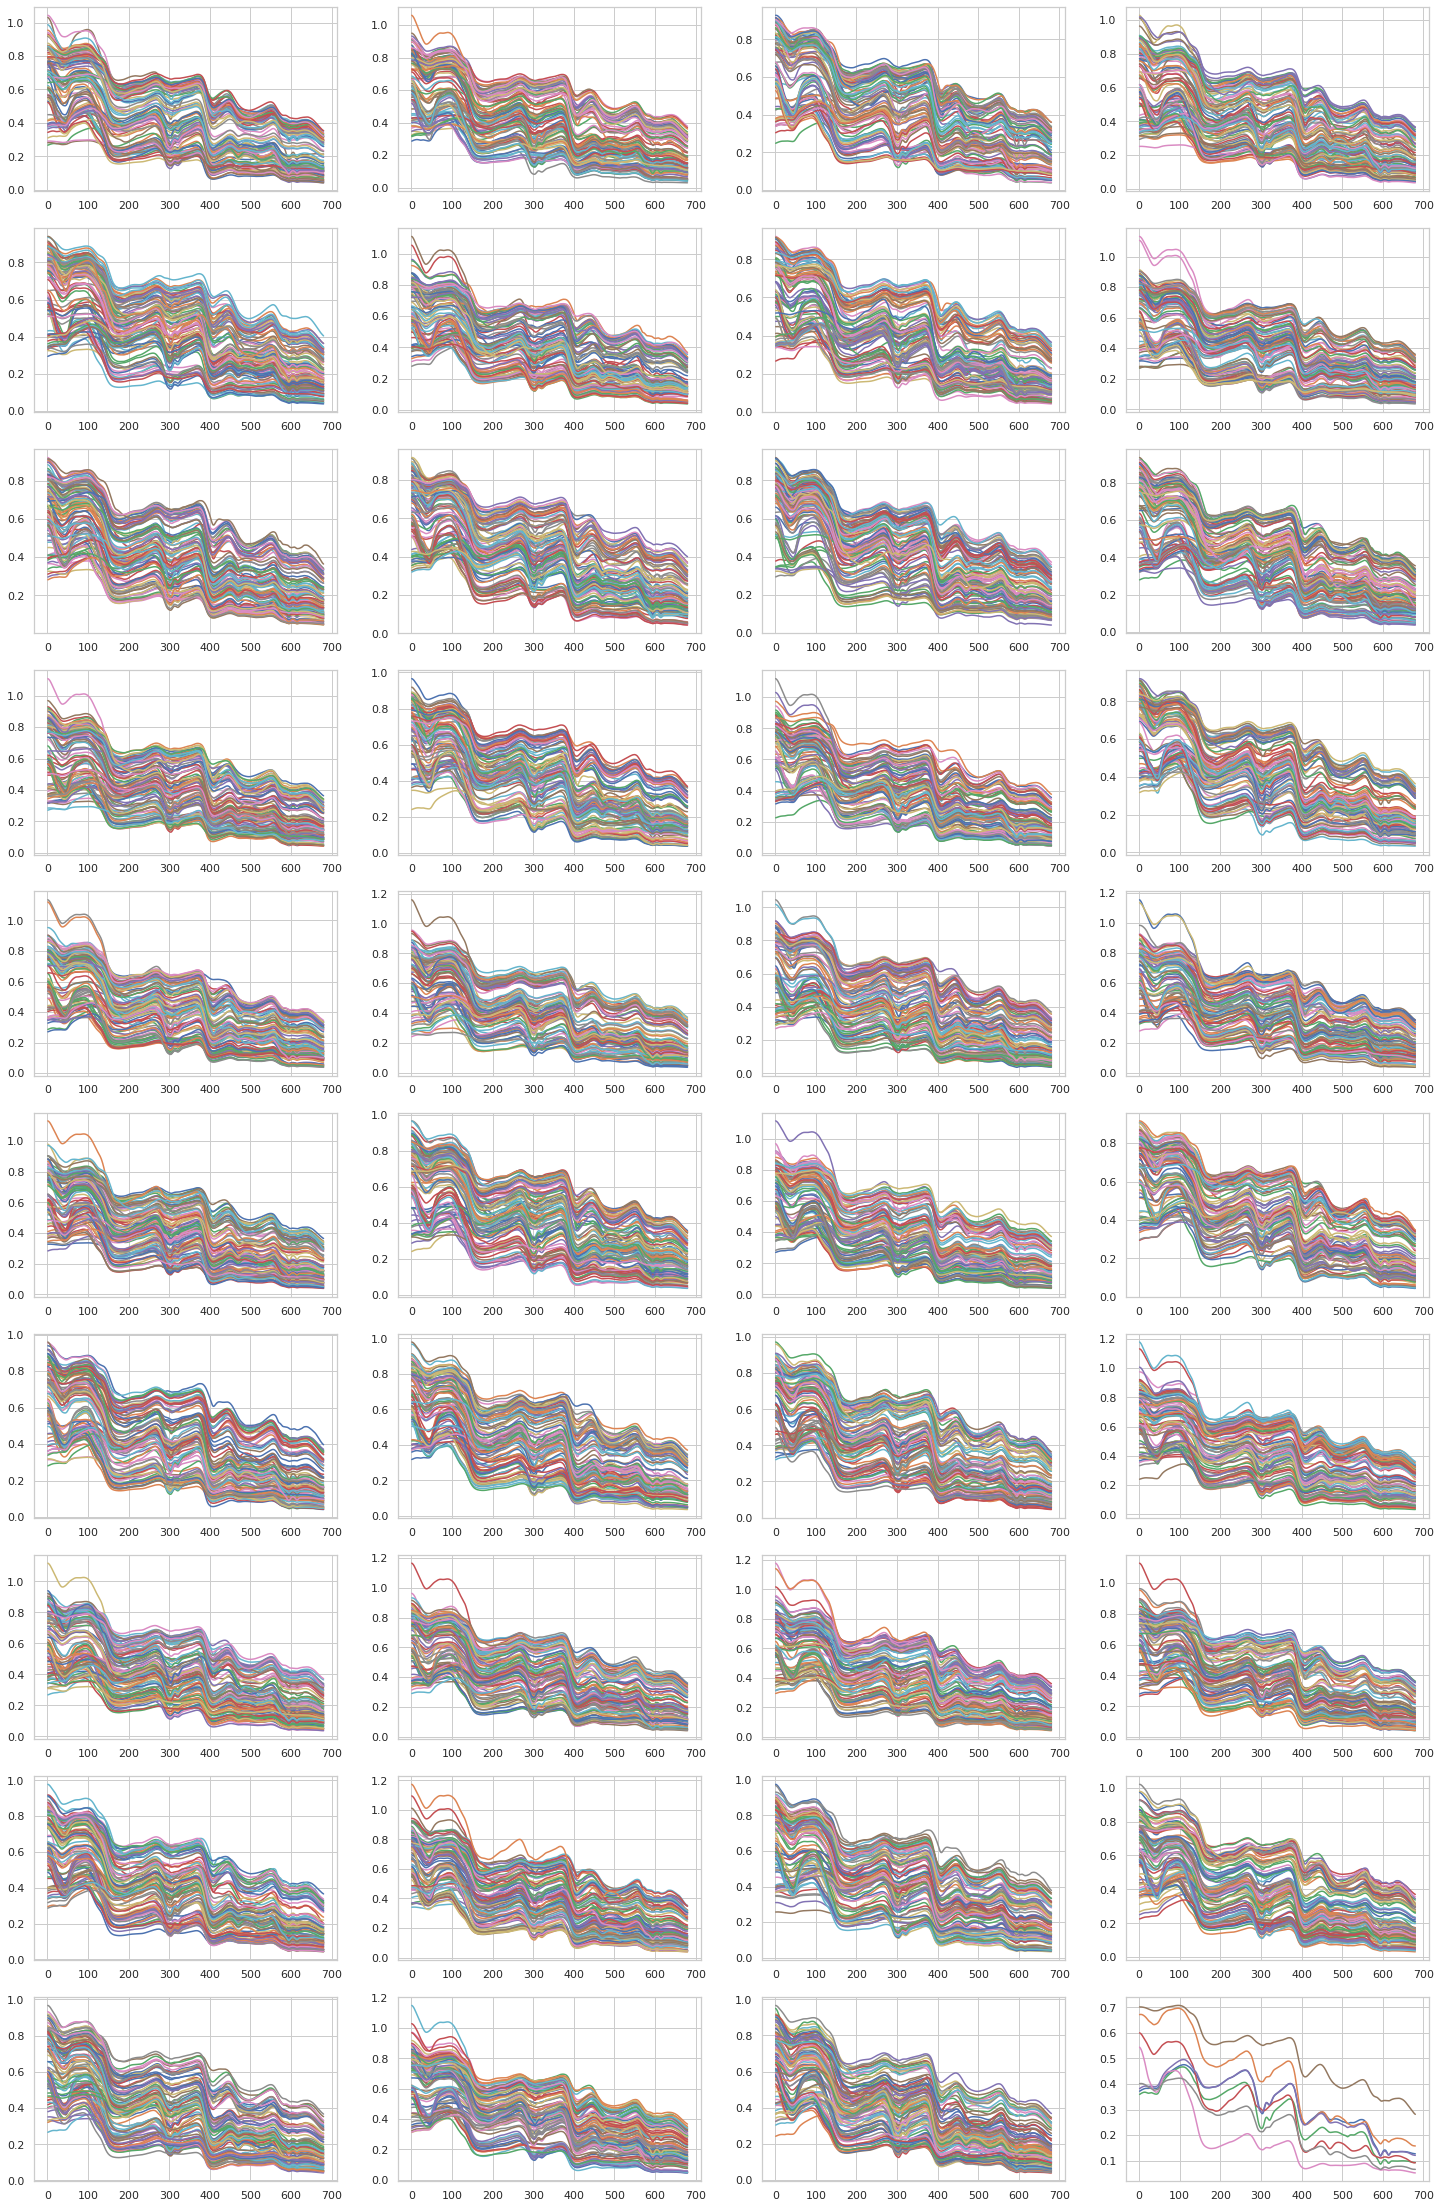

In [8]:
x1 = 4
y1 = 10

fig, axs = plt.subplots(y1, x1, figsize=(25,40))
i = 0

def make_pairs(xr, yr, nr):
    """Produces indexes for the plot"""
    i = 0
    for y in range(yr):
        for x in range(xr):
            for nn in range(nr):
                yield y, x, i
                i += 1

for y, x, i in make_pairs(x1, y1, 100):    
    axs[y][x].plot(range(1,681), df.iloc[i,:-1])
    if i+1 >= len(df):
        break

Rough inspection indicates that obtained samples are correct. All value are within a reasonable range and follow similar pattern.  
Let's check the dependent variable.

<AxesSubplot:>

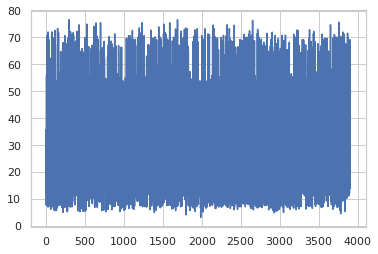

In [9]:
df['y'].plot()

Dependent variable is in a range of 0-80. Let's check some basic statistics and ket's plot the y distribution.

Max: 76.60, Mean: 31.25, Min: 3.06, Std: 20.04


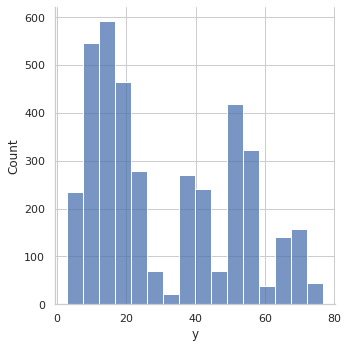

In [10]:
print("Max: {:.2f}, Mean: {:.2f}, Min: {:.2f}, Std: {:.2f}".format(df['y'].max(), df['y'].mean(), df['y'].min(), df['y'].std()))
sns.displot(df, x='y')

Dependent variable is not normally distributed.  
Since spectral data is difficult to interpret visually we can try to use PCA and clustering to gain insight into data. 
### Principal Components Analysis
PCA is a technique for dimensionality reduction by projecting of data into a lower dimensional space. The directions in the new space are chosen in such a way that they point in the direction of biggest data variance and are orthogonal to each other.

array([0.92093297, 0.97457095, 0.9911958 , 0.99548208, 0.99790766,
       0.99877301, 0.99926401, 0.99968207, 0.99979399, 0.99985349])

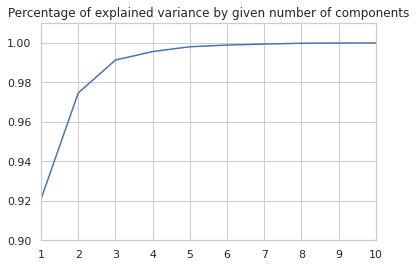

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1]
y = df['y']
X = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X)
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum()[:10])
plt.title("Percentage of explained variance by given number of components")
plt.xlim([1, 10])
plt.ylim([0.9, 1.01])
pca.explained_variance_ratio_.cumsum()[:10]

First 10 components explain over 99.985% of variation in data, which is enough.

Let's check data points in 2 most important components space.

PC1 standard deviation: 25.025
PC2 standard deviation: 6.039


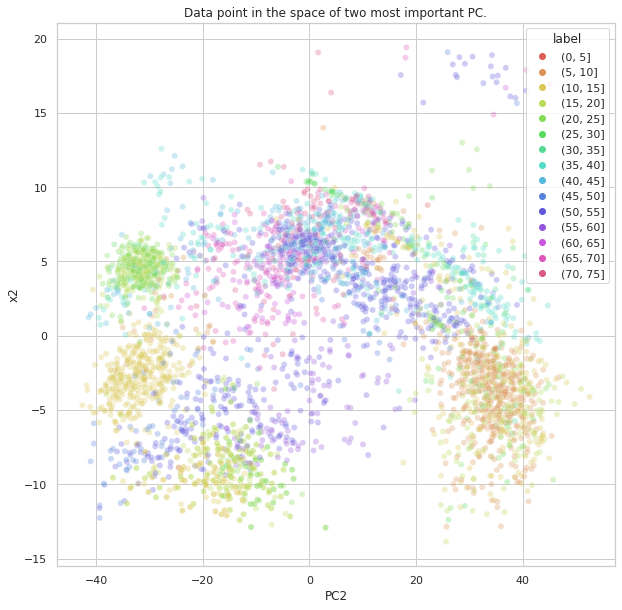

In [12]:
X = df.iloc[:,:-1]
y = df['y']
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

y_cut = pd.cut(df['y'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
res = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 
                    'label':y_cut})
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.scatterplot(
    x='x1', y='x2',
    hue='label',
    palette=sns.color_palette("hls", 15),
    data=res,
    legend="full",
    alpha=0.3,
    ax=ax
)
ax.set_xlabel('PC1')
ax.set_xlabel('PC2')
ax.set_title('Data point in the space of two most important PC.')
print('PC1 standard deviation: {:.3f}'.format(X[:,0].std()))
print('PC2 standard deviation: {:.3f}'.format(X[:,1].std()))

Some clusers can be observed with same value of the output variable. Nevertheless, it is impossible to interpret them without insight into data origin. Moreover, there are data points at the top of the plot that (after the transformation) are further apart (but less than 3 std). Let's check them.

Text(0.5, 1.0, 'Random samples')

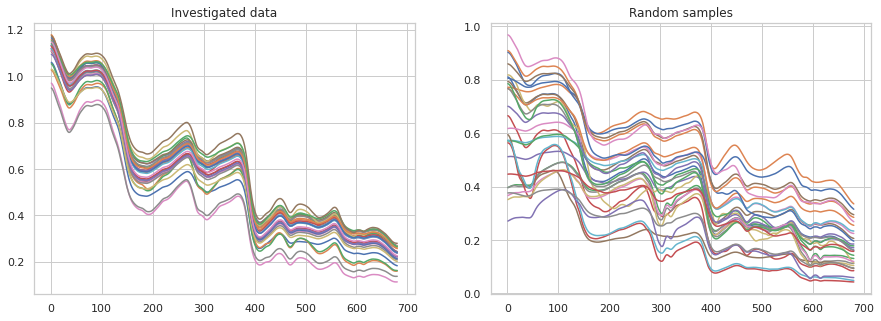

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
for x in range(28):
    axs[0].plot(range(1,681), df[X[:,1] > 14].iloc[x,:-1])
i = 0
for x in range(28):
    i = np.random.randint(0,3907)
    axs[1].plot(range(1,681), df.iloc[i,:-1])
axs[0].set_title('Investigated data')
axs[1].set_title('Random samples')

The investidated data points exhibits similar pattern when compared to random sampling, so probably it is not a measurment error.  
Now let's check direction of the first three PCs.

Text(0.5, 0, 'Feature number')

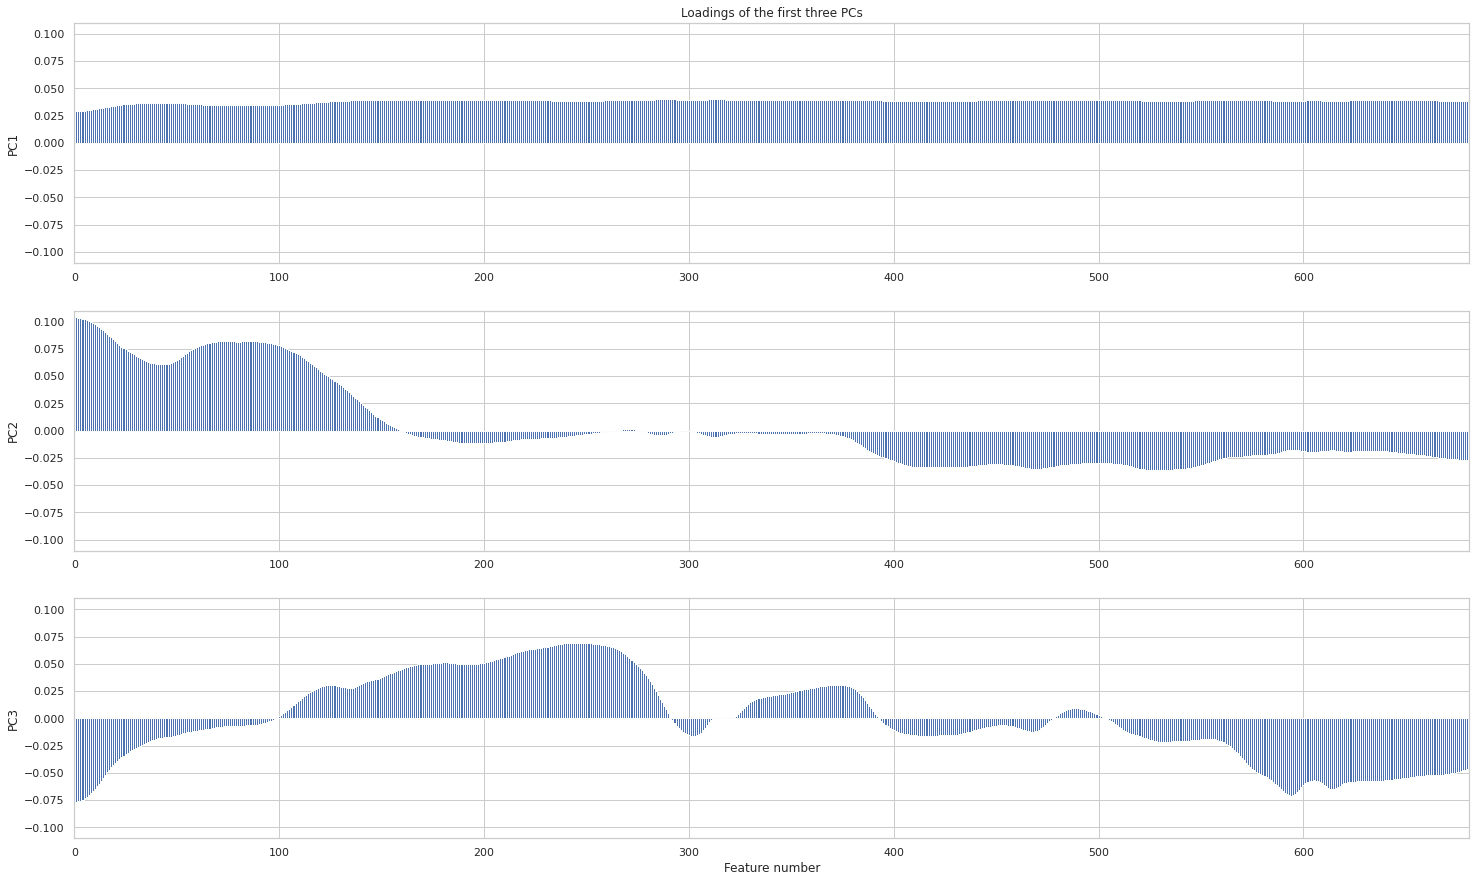

In [14]:
X = df.iloc[:,:-1]
y = df['y']
X = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(X)

fig, axs = plt.subplots(3, 1, figsize=(25,15))
axs[0].bar(range(1,681), pca.components_[0,:], width=1.0)
axs[1].bar(range(1,681), pca.components_[1,:], width=1.0)
axs[2].bar(range(1,681), pca.components_[2,:], width=1.0)
i = 0
for x in ['PC1', 'PC2', 'PC3']:
  axs[i].set_xlim([0.,681])
  axs[i].set_ylim([-0.11,0.11])
  axs[i].set_ylabel(x)
  i+=1
axs[0].set_title('Loadings of the first three PCs')
axs[2].set_xlabel('Feature number')

First component almost equally points in direction of every feature, so using only it to model data would results in an average that has been substracted with StandardScaler() and that can be shifted. Second component points in direction of features x < 100 and x > 400, and these are features for which biggest variations are observed over the average that is shifted by the first component. Third component direction focuses on ranges: x < 50, 100 < x < 270 and x > 550.  
Now let's plot R2 per column depending on the number of PCs.

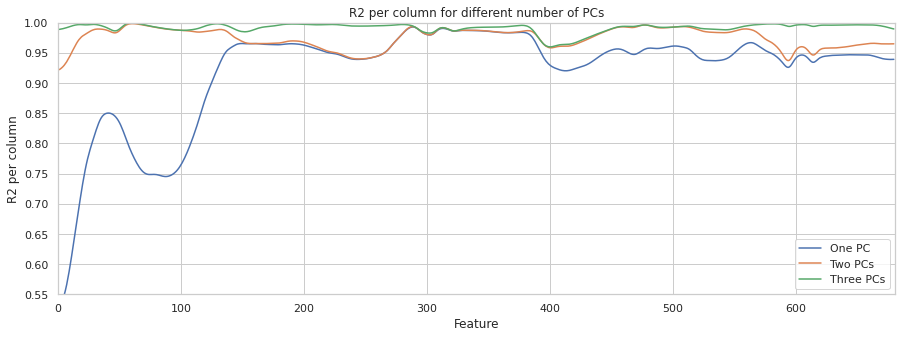

In [15]:
X = df.iloc[:,:-1]
y = df['y']
X = StandardScaler().fit_transform(X)
r2_col = []
for x in range(3):
    pca = PCA(n_components=x+1)
    pca.fit(X)
    T = pca.transform(X)
    Xpred = np.dot(T, pca.components_)
    err = X - Xpred
    X_var = np.var(X, axis=0)
    err_var = np.var(err, axis=0)
    r2_col.append(1.-(err_var/X_var))
    
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(range(1,681), r2_col[0], label = 'One PC')
ax.plot(range(1,681), r2_col[1], label = 'Two PCs')
ax.plot(range(1,681), r2_col[2], label = 'Three PCs')
ax.set_xlim([0, 681])
ax.set_ylim([0.55, 1.0])
ax.set_xlabel('Feature')
ax.set_ylabel('R2 per column')
ax.set_title('R2 per column for different number of PCs')
ax.legend()

First component explains well (>90%) regions of spectra for x > 120.
Second component is mostly responsible for explaining x < 120 and corrects some predictions for 400 < x < 550.
Third component explains additional variability for x < 300 and x > 500.

### t-SNE
Let's further investigate data by use of t-SNE. t-distributed Stochastic Neighbor Embedding is a manifold learning algorithm that allows for much advanced data visualization than PCA. The main idea of t-SNE is to find 2 dimensional representation of data that preserves distances between points as best as possible. It start with random 2D representation for each point and then iterates bringing together points that are close to each other in the original feature space and points that are far apart puts farther apart.
Our data set consists of 680 dependent features. t-SNE does not handle well data with big number of features so it is recomended to reduce the features number with use of PCA beforehand. Therefore we will first reduce the design space to only the first 10 principal components.

In [16]:
X = df.iloc[:,:-1]
y = df['y']
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)
pca.fit(X)
X = pca.transform(X)

Let's define a function to plot points in space defined by t-SNE. We will also group data points based on their y value.

In [17]:
def plot_TSNE(df, tsne_res, ax = None, title=None):
    y_cut = pd.cut(df['y'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
    res = pd.DataFrame({'x1': tsne_res[:,0], 'x2': tsne_res[:,1], 
                        'label':y_cut})
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(10,10))
    sns.scatterplot(
        x='x1', y='x2',
        hue='label',
        palette=sns.color_palette("hls", 15),
        data=res,
        legend="full",
        alpha=0.3,
        ax=ax
    )
    if title != None:
        ax.set_title(title)

First we try to find sufficient number of iterations.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3908 samples in 0.006s...
[t-SNE] Computed neighbors for 3908 samples in 0.161s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3908
[t-SNE] Computed conditional probabilities for sample 2000 / 3908
[t-SNE] Computed conditional probabilities for sample 3000 / 3908
[t-SNE] Computed conditional probabilities for sample 3908 / 3908
[t-SNE] Mean sigma: 1.450635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.867012
[t-SNE] KL divergence after 500 iterations: 0.643411
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3908 samples in 0.005s...
[t-SNE] Computed neighbors for 3908 samples in 0.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3908
[t-SNE] Computed conditional probabilities for sample 2000 / 3908
[t-SNE] Computed conditional probabilities for sample 3000 / 3908
[t-SNE] Computed conditional probabilities for sample 3908 / 3908
[t-SNE] Mean sigma: 1.450635

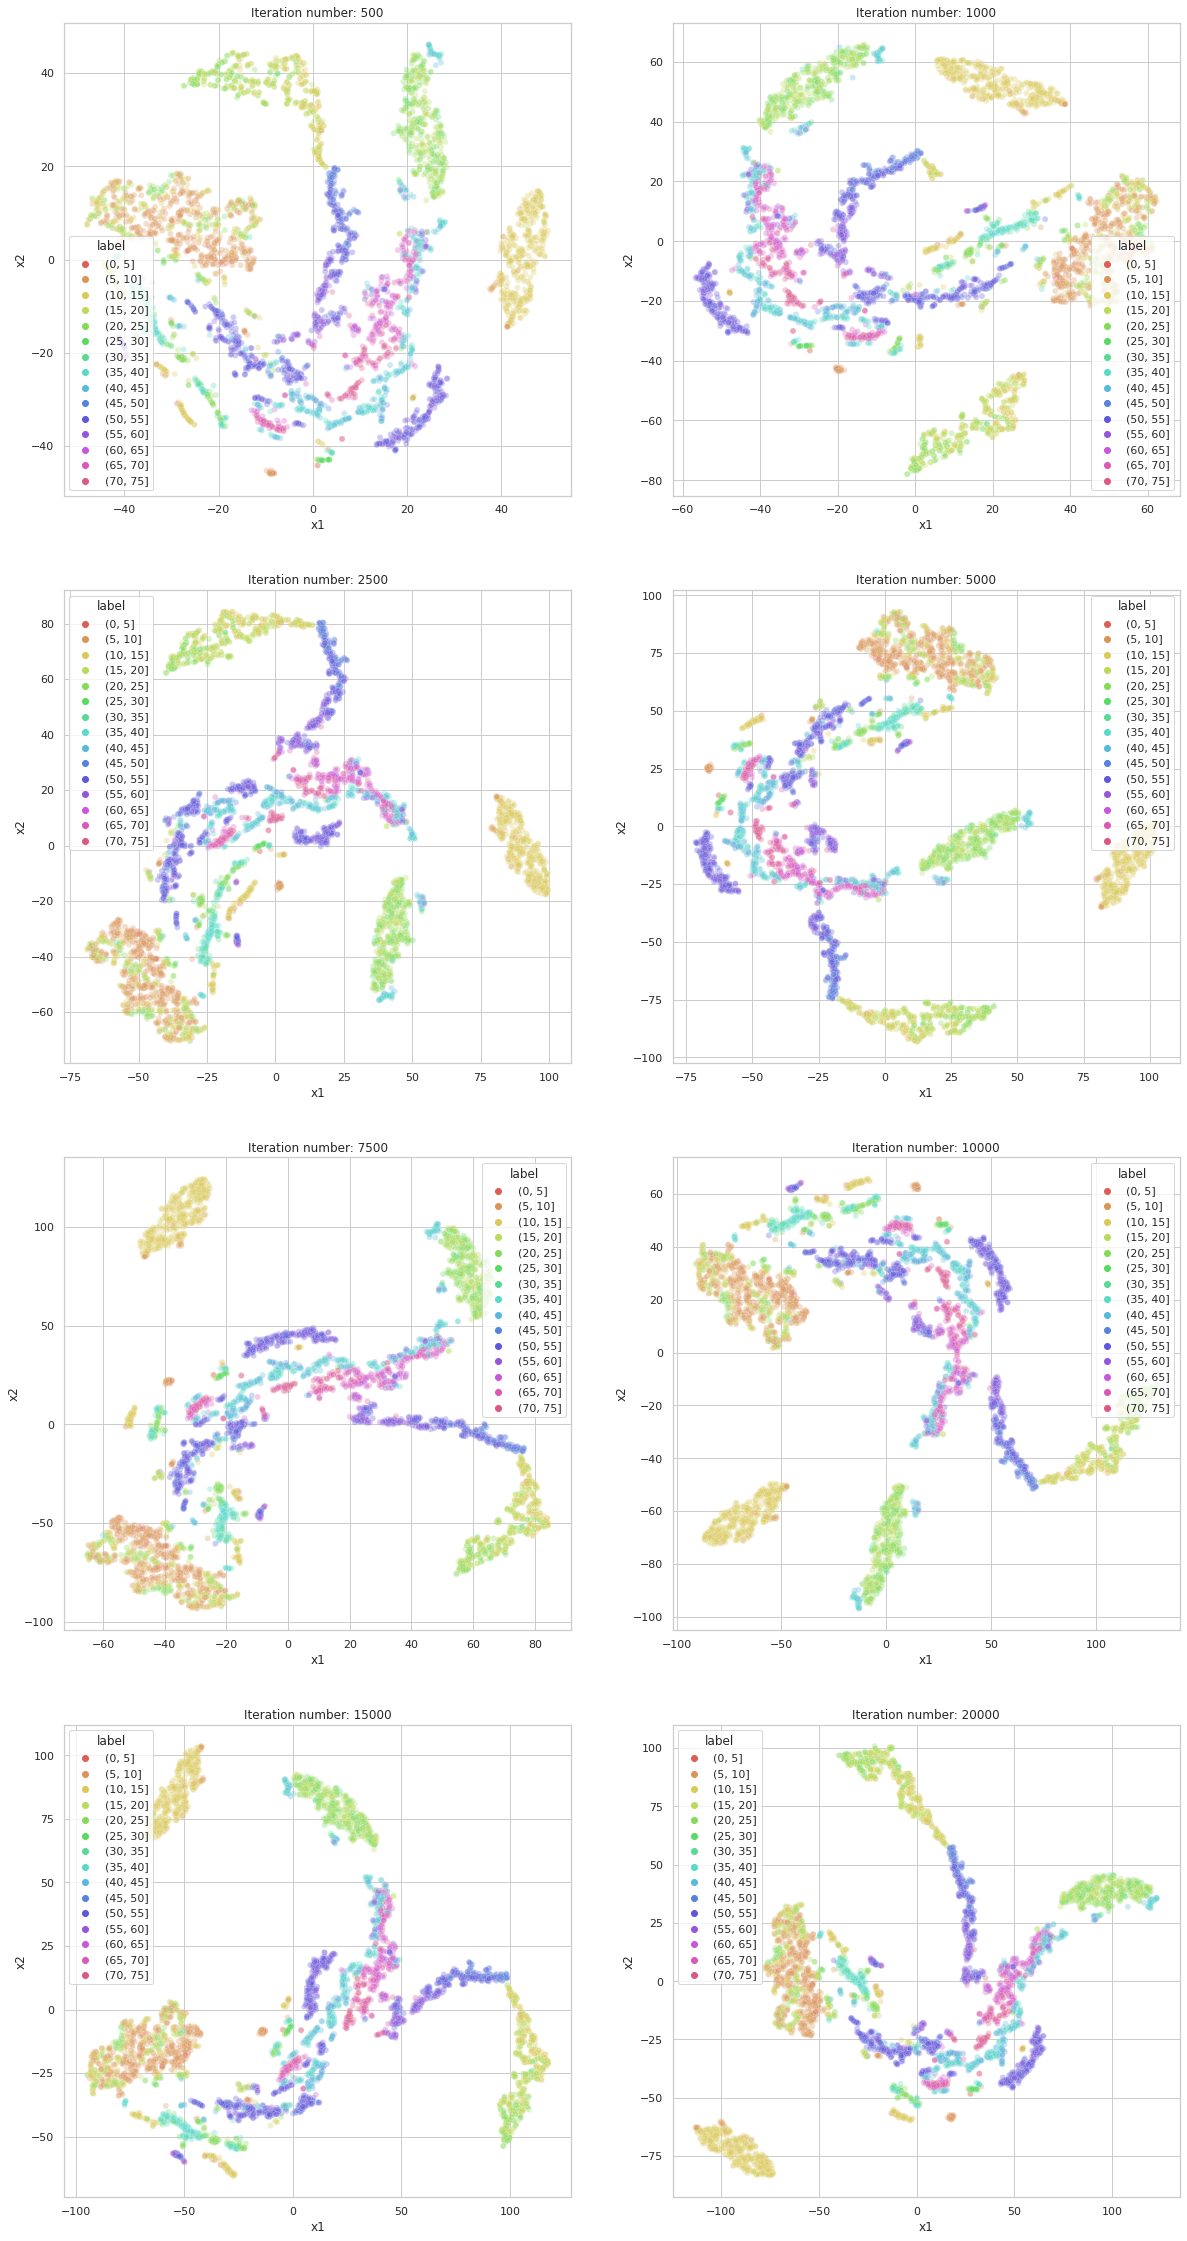

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X = df.iloc[:,:-1]
y = df['y']
X = StandardScaler().fit_transform(X)
X = pca.transform(X)

fig, axs = plt.subplots(4, 2, figsize=(20,40))
axs = axs.flatten()
i = 0
for it in [500, 1000, 2500, 5000, 7500, 10000, 15000, 20000]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=it)
    tsne_results = tsne.fit_transform(X)
    plot_TSNE(df, tsne_results, axs[i], 'Iteration number: {:d}'.format(it))
    i += 1

Color of the points indicates different values of our dependent variable.  
11000 iteration is sufficient for convergence and starting from 250 iterations the same shape (but rotated) can be observed. Let's try different perplexity values.  

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3908 samples in 0.005s...
[t-SNE] Computed neighbors for 3908 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3908
[t-SNE] Computed conditional probabilities for sample 2000 / 3908
[t-SNE] Computed conditional probabilities for sample 3000 / 3908
[t-SNE] Computed conditional probabilities for sample 3908 / 3908
[t-SNE] Mean sigma: 0.605938
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.136833
[t-SNE] KL divergence after 11000 iterations: 0.564418
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3908 samples in 0.005s...
[t-SNE] Computed neighbors for 3908 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3908
[t-SNE] Computed conditional probabilities for sample 2000 / 3908
[t-SNE] Computed conditional probabilities for sample 3000 / 3908
[t-SNE] Computed conditional probabilities for sample 3908 / 3908
[t-SNE] Mean sigma: 0.827265

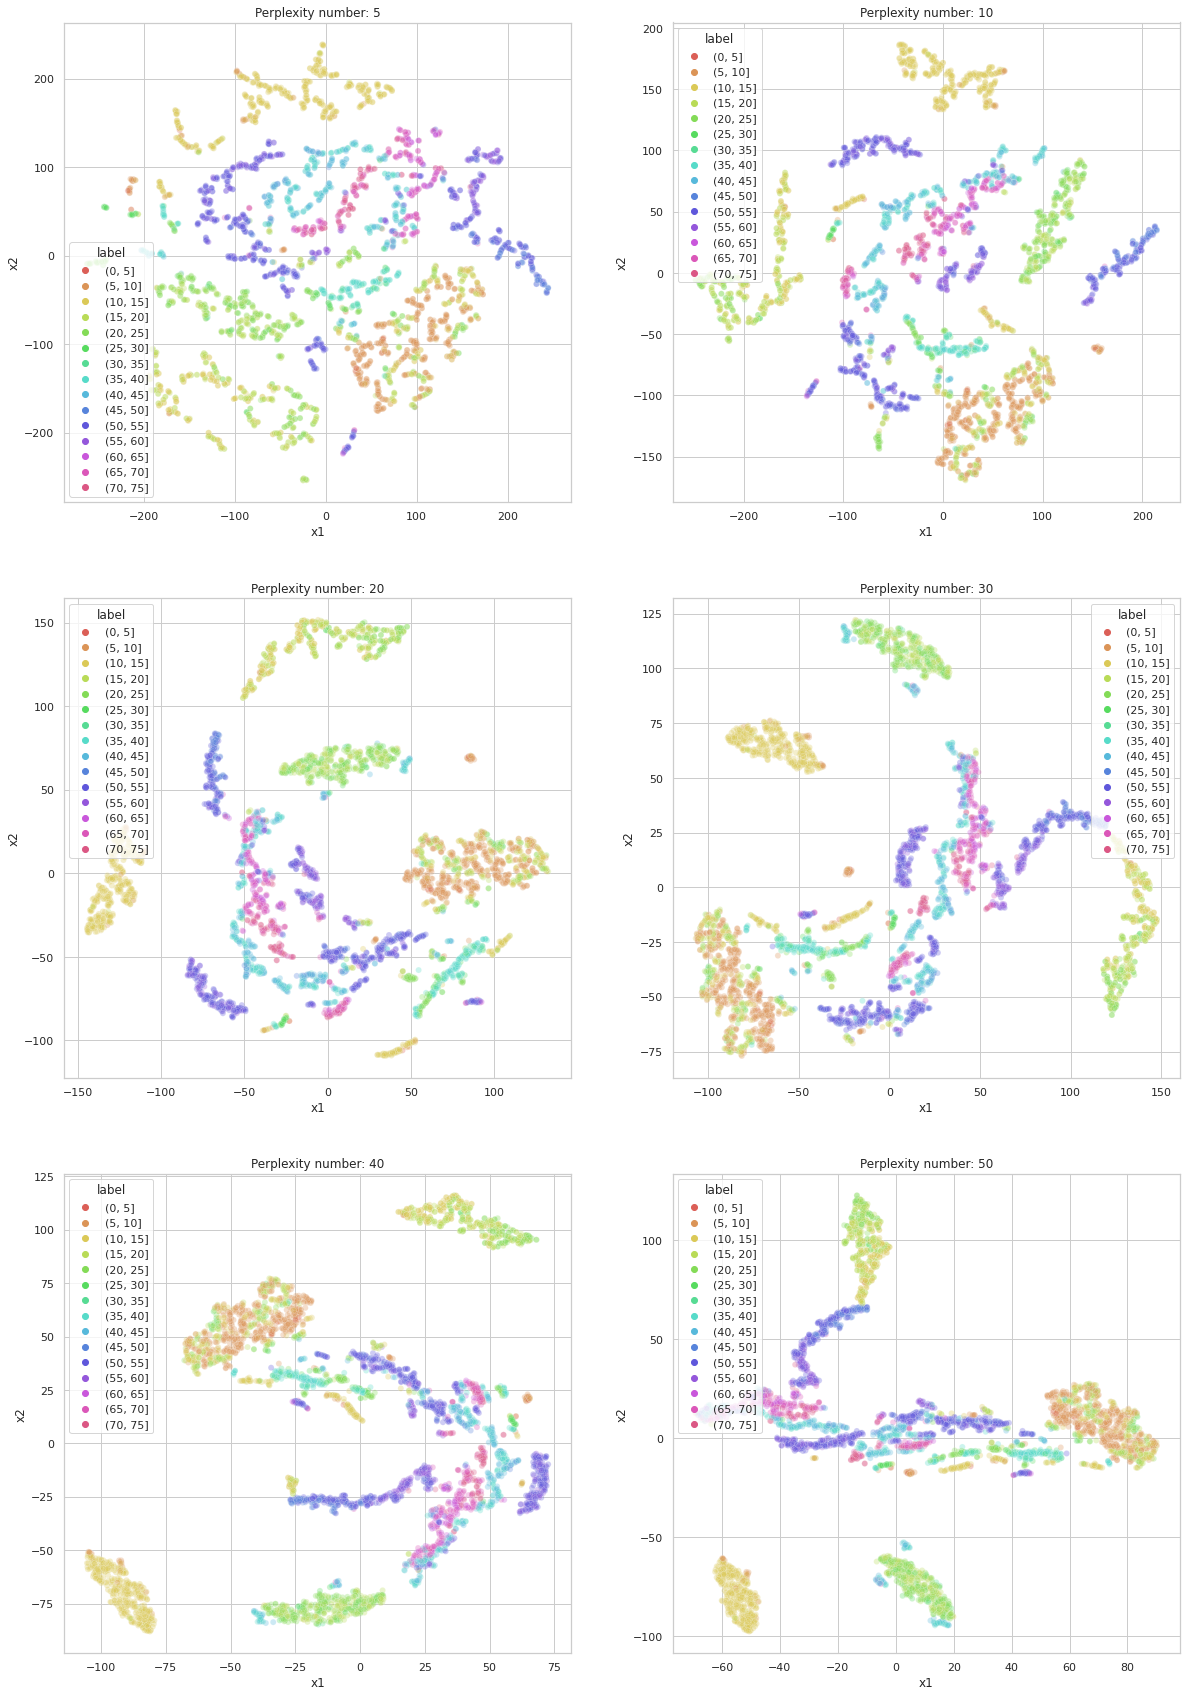

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X = df.iloc[:,:-1]
y = df['y']
X = StandardScaler().fit_transform(X)
X = pca.transform(X)

fig, axs = plt.subplots(3, 2, figsize=(20,30))
axs = axs.flatten()
i = 0
for pr in [5, 10, 20, 30, 40, 50]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=pr, n_iter=11000)
    tsne_results = tsne.fit_transform(X)
    plot_TSNE(df, tsne_results, axs[i], 'Perplexity number: {:d}'.format(pr))
    i += 1

Some data points definitly create separate clusters, now even more distinct than with use of PCA. What can be especially observed is that there are different groups formed depending on their 'y' value. The data points grouped inside the plot (for y > 30) are harder to separate but they still form distinct clusters.

### Data split
Time to divide sample on test and training data.

In [20]:
#Split data
from sklearn.model_selection import train_test_split
#randomness turned off for reproducibility
ran = 33
X = df.iloc[:,:-1]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=ran)

### Define metrics
According to documentation two metrics should be used to assess the model performance: R2 and RMSE. We will use R2 as a primary parameter for grid search and RMSE will be controlled and verified manually.

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

#by default negative and squared metric is used so we redefine it with use of make_scorer
score = {'r2': 'r2', 'RMSE': make_scorer(mean_squared_error, greater_is_better=True, squared=False)}

### Linear regression with regularization
First we start with a simple linear regression with regularization in reduced PCA space. To prevent any possible data leakage from training to validation we build a pipeline. Linear models try to find a hyperplane that minimizes the sum of square distances from predictions to observed values. Regularization is added to minimize the values of model coefficients: w. By that model is forced to reduce variance and to generalize more. Three regularization techniques will be considered: Ridge, where penelty is put on l2-norm (euclidean distance) of weights, Lasso where l1-norm (manhattan distance) is used, and Elastic Net which is combination of them both.

In [22]:
#%% Linear Regression with PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

pipe_lin1 = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                            ('lin', Ridge(max_iter=100000))])
pipe_lin2 = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                            ('lin', Lasso(max_iter=100000))])
pipe_lin3 = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                            ('lin', ElasticNet(max_iter=100000))])

models = [pipe_lin1, pipe_lin2, pipe_lin3]
params = [{'lin__alpha':[.001, .01, .1, 1., 10., 100.]}, {'lin__alpha':[.001, .01, .1, 1., 10., 100.]},
          {'lin__alpha':[.001, .01, .1, 1., 10., 100.], 
           'lin__l1_ratio':[.001, .01, .1, 0.5, 0.9, 0.99, 0.999, 0.9999]}]
best_param = []
grid_search = []
best_scores = []

for x in range(3):
    grid_search.append(GridSearchCV(models[x], param_grid = params[x], return_train_score =True,
                                   scoring=score, refit = 'r2'))
    grid_search[x].fit(X_train, y_train)
    best_param.append(grid_search[x].best_params_)
    best_scores.append(grid_search[x].best_score_)
    
mask0 = np.array(grid_search[0].cv_results_['params']) == grid_search[0].best_params_
mask1 = np.array(grid_search[1].cv_results_['params']) == grid_search[1].best_params_
mask2 = np.array(grid_search[2].cv_results_['params']) == grid_search[2].best_params_
print("Best scores of each of the models:")
print("Ridge: R2 {:.3f}, RMSE {:.2f}".format(best_scores[0],
                        grid_search[0].cv_results_['mean_test_RMSE'][mask0][0]))
print("Lasso: R2 {:.3f}, RMSE {:.2f}".format(best_scores[1],
                        grid_search[1].cv_results_['mean_test_RMSE'][mask1][0]))
print("ElasticNet: R2 {:.3f}, RMSE {:.2f}".format(best_scores[2],
                            grid_search[2].cv_results_['mean_test_RMSE'][mask2][0]))
print("Best parameters for each of the models:")
print("Ridge: {:s}".format(json.dumps(best_param[0])))
print("Lasso: {:s}".format(json.dumps(best_param[1])))
print("ElasticNet: {:s}\n".format(json.dumps(best_param[2])))

Best scores of each of the models:
Ridge: R2 0.946, RMSE 4.63
Lasso: R2 0.946, RMSE 4.63
ElasticNet: R2 0.946, RMSE 4.63
Best parameters for each of the models:
Ridge: {"lin__alpha": 0.001}
Lasso: {"lin__alpha": 0.001}
ElasticNet: {"lin__alpha": 0.001, "lin__l1_ratio": 0.9999}



Linear model give accuracy of 94.6%, which is a good result given that data may exhibit nonlinear behaviour and that dependend variable distribution is not normal.
Let's check accuracy of the best estimator for Ridge regression with the test data.

In [23]:
lin = grid_search[0].best_estimator_
print('Score of linear regression with ridge regularization for test is: R2 {:.3f}, RMSE {:.2f}'.format(lin.score(X_test, y_test),
                                                            mean_squared_error(lin.predict(X_test), y_test, squared=False)))

Score of linear regression with ridge regularization for test is: R2 0.939, RMSE 4.95


### Partial Least Squares Regression
One of the problem with applying of PCA is the fact that it is an unsupervised learning algorithm that chooses orthogonal components with the highest variance. It may be the case that lower variance features are relevant for prediction of y. Therefore, it is often more benficial to apply Partial Least Squares Regression, which also reduces dimensionality of data but is a supervised learning algorithm. It looks for variance directions in X that maximally explain variance in Y.

In [24]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=10, max_iter=10000)
pls_pip = Pipeline(steps=[('scaler', StandardScaler()),
                            ('pls', PLSRegression(n_components=10, max_iter=10000))])
pls_pip.fit(X_train, y_train)
print('PLS regression for train is: R2 {:.3f}, RMSE {:.2f}'.format(pls_pip.score(X_train, y_train),
                                                            mean_squared_error(pls_pip.predict(X_train), y_train, squared=False)))
print('PLS regression for test is: R2 {:.3f}, RMSE {:.2f}'.format(pls_pip.score(X_test, y_test),
                                                            mean_squared_error(pls_pip.predict(X_test), y_test, squared=False)))

PLS regression for train is: R2 0.971, RMSE 3.44
PLS regression for test is: R2 0.965, RMSE 3.73


Partial least squares outperforms linear regression combined with PCA.

### k-Nearest Neighbours
k-Nearest Neighbours is another simple regression model, which makes prediction based on average value from k-nearest points. The algorithm cannot be applied for extrapolation.

In [25]:
#%% Regression based on k-nearest neighbors.
from sklearn.neighbors import KNeighborsRegressor

pipe_knn = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                           ('knn', KNeighborsRegressor())])
params = {'knn__n_neighbors': [1,3,5,10,15,20]}
grid_search = GridSearchCV(pipe_knn, param_grid = params, return_train_score =True, n_jobs = -1, verbose = 1,
                          scoring=score, refit = 'r2')
grid_search.fit(X_train, y_train)

mask = np.array(grid_search.cv_results_['params']) == grid_search.best_params_
print("Best score for train: R2 {:.3f}, RMSE {:.2f}.".format(grid_search.best_score_,
                        grid_search.cv_results_['mean_test_RMSE'][mask][0]))
print("Best parameters for each of the models: {:s}.".format(json.dumps(grid_search.best_params_)))
knn = grid_search.best_estimator_
print('Score of kNN regression for test is: R2 {:.3f}, RMSE {:.2f}'.format(knn.score(X_test, y_test),
                                        mean_squared_error(knn.predict(X_test), y_test, squared=False)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.0s finished


Best score for train: R2 0.966, RMSE 3.69.
Best parameters for each of the models: {"knn__n_neighbors": 3}.
Score of kNN regression for test is: R2 0.976, RMSE 3.07


k-Nearest Neighbours regression yields results on a similar level as PLS regression.  
The results are so good that we decide to recheck our code for possible data leaks. Moreover, we check whether by error our 'y' was not left in X.

In [26]:
X

x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11   x12   x13   x14   x15   x16   x17   x18   x19   x20   x21   x22   x23   x24   x25   x26   x27   x28   x29   x30  ...  x651  x652  x653  x654  x655  x656  x657  x658  x659  x660  x661  x662  x663  x664  x665  x666  x667  x668  x669  x670  x671  x672  x673  x674  x675  x676  x677  x678  x679  x680
0    0.597 0.596 0.594 0.591 0.587 0.583 0.579 0.572 0.566 0.560 0.552 0.544 0.537 0.528 0.521 0.512 0.505 0.498 0.490 0.483 0.478 0.470 0.465 0.459 0.454 0.450 0.444 0.440 0.437 0.432  ... 0.134 0.134 0.133 0.133 0.132 0.131 0.131 0.130 0.129 0.129 0.128 0.127 0.126 0.125 0.125 0.124 0.123 0.122 0.121 0.120 0.120 0.119 0.118 0.118 0.117 0.116 0.116 0.115 0.115 0.115
1    0.954 0.953 0.952 0.950 0.948 0.946 0.944 0.941 0.938 0.934 0.931 0.928 0.925 0.922 0.919 0.916 0.913 0.910 0.907 0.903 0.899 0.895 0.891 0.887 0.882 0.878 0.874 0.870 0.866 0.863  ... 0.339 0.337 0.336 0.334 0.331 0.329 0.327 0.325 0.322 0.319 0.316 0.313 0.310 0.307 0.304 0.301 0.298 0.295 0.293 0.290 0.288 0.285 0.283 0.281 0.279 0.277 0.276 0.274 0.273 0.272
2    0.611 0.610 0.607 0.605 0.601 0.597 0.593 0.587 0.581 0.574 0.567 0.559 0.552 0.544 0.536 0.528 0.520 0.513 0.507 0.500 0.494 0.489 0.484 0.479 0.473 0.469 0.464 0.459 0.455 0.451  ... 0.128 0.128 0.127 0.127 0.126 0.126 0.125 0.125 0.124 0.123 0.123 0.122 0.121 0.121 0.120 0.120 0.119 0.118 0.118 0.117 0.116 0.116 0.115 0.114 0.114 0.113 0.113 0.112 0.112 0.111
3    0.343 0.344 0.345 0.346 0.347 0.347 0.348 0.349 0.349 0.350 0.350 0.351 0.351 0.351 0.351 0.351 0.350 0.350 0.349 0.348 0.348 0.347 0.347 0.347 0.347 0.348 0.348 0.349 0.349 0.349  ... 0.089 0.089 0.089 0.089 0.089 0.089 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.088 0.087 0.087 0.086 0.086 0.085 0.085 0.085 0.084 0.084 0.084 0.084 0.084 0.084 0.084 0.084 0.084
4    0.761 0.761 0.761 0.761 0.761 0.761 0.761 0.760 0.760 0.760 0.759 0.759 0.758 0.757 0.757 0.756 0.755 0.754 0.753 0.752 0.752 0.751 0.750 0.749 0.748 0.748 0.747 0.746 0.746 0.745  ... 0.351 0.350 0.348 0.347 0.345 0.343 0.341 0.339 0.337 0.335 0.332 0.330 0.328 0.326 0.323 0.321 0.319 0.317 0.314 0.312 0.310 0.308 0.306 0.304 0.302 0.300 0.298 0.296 0.295 0.293
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
3903 0.600 0.599 0.598 0.597 0.595 0.593 0.591 0.589 0.586 0.583 0.581 0.578 0.575 0.573 0.570 0.568 0.565 0.563 0.560 0.557 0.553 0.550 0.547 0.543 0.540 0.537 0.534 0.531 0.528 0.526  ... 0.112 0.112 0.111 0.111 0.110 0.109 0.109 0.108 0.107 0.106 0.105 0.104 0.103 0.101 0.100 0.099 0.098 0.097 0.096 0.095 0.095 0.094 0.093 0.093 0.092 0.092 0.092 0.092 0.092 0.092
3904 0.382 0.383 0.384 0.385 0.386 0.387 0.388 0.389 0.389 0.390 0.391 0.391 0.391 0.392 0.392 0.392 0.392 0.392 0.391 0.391 0.391 0.391 0.391 0.391 0.391 0.391 0.392 0.392 0.392 0.392  ... 0.135 0.135 0.135 0.134 0.134 0.134 0.134 0.133 0.133 0.132 0.132 0.132 0.131 0.130 0.129 0.128 0.128 0.127 0.126 0.125 0.124 0.124 0.123 0.123 0.122 0.122 0.121 0.121 0.121 0.121
3905 0.701 0.701 0.701 0.701 0.701 0.701 0.701 0.701 0.700 0.700 0.700 0.700 0.699 0.699 0.698 0.698 0.697 0.697 0.696 0.695 0.694 0.694 0.693 0.692 0.692 0.691 0.691 0.690 0.689 0.689  ... 0.337 0.335 0.334 0.333 0.331 0.329 0.327 0.325 0.323 0.321 0.319 0.317 0.315 0.313 0.310 0.308 0.306 0.304 0.302 0.299 0.297 0.295 0.293 0.291 0.289 0.287 0.286 0.284 0.283 0.281
3906 0.544 0.542 0.540 0.537 0.534 0.530 0.525 0.520 0.515 0.509 0.503 0.497 0.490 0.483 0.476 0.469 0.462 0.454 0.446 0.439 0.432 0.426 0.421 0.416 0.412 0.408 0.405 0.401 0.398 0.394  ... 0.061 0.061 0.061 0.060 0.060 0.060 0.060 0.059 0.059 0.059 0.058 0.058 0.057 0.057 0.057 0.056 0.056 0.055 0.055 0.05

The training data is 'clean', so we proceed further with the analysis.

### Support Vector Regression
Support vector regression looks for the hyperplane that minimizes the weights coefficients w and error connected with points that lie outside of a marging of tolerance. Usually only few points violate the marging and they are used to define the hyperplane, these are the support vectors that the method is named after. Moreover, in nonlinear SVR the kernel functions are used to transform the data into a higher dimensional feature space, where linear separation is done, the so-called 'kernel trick'. 

In [27]:
#%% Support Vector Regression
from sklearn.svm import SVR

params = [{'svr__kernel': ['rbf'],
           'svr__C': [0.1, 1.0, 10., 100., 1000., 10000.],
           'svr__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0]}]
pipe_svm = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                           ('svr', SVR(max_iter=100000))])
grid_search = GridSearchCV(pipe_svm, param_grid = params, scoring = score, refit = 'r2',
                           return_train_score =True, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

mask = np.array(grid_search.cv_results_['params']) == grid_search.best_params_
print("Best score for train: R2: {:.3f}, RMSE: {:.2f}".format(grid_search.best_score_,
      grid_search.cv_results_['mean_test_RMSE'][mask][0]))
print("Best parameters for each of the models: {:s}".format(json.dumps(grid_search.best_params_)))
svr = grid_search.best_estimator_
print('Scores of svm regression for test is: R2: {:.3f}, RMSE: {:.2f}'.format(svr.score(X_test, y_test),
                                                mean_squared_error(svr.predict(X_test), y_test, squared=False)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished
/home/ing3lo/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Best score for train: R2: 0.994, RMSE: 1.48
Best parameters for each of the models: {"svr__C": 1000.0, "svr__gamma": 0.01, "svr__kernel": "rbf"}
Scores of svm regression for test is: R2: 0.996, RMSE: 1.28


SVR outperforms preceeding algorithms. 99.6% is so close to our threshold set by 10 PCA components(99.985) that in this case we rerun our example on 5 more principle components.

In [28]:
#%% Support Vector Regression for 15 PCA
params = [{'svr__kernel': ['rbf'],
           'svr__C': [0.1, 1.0, 10., 100., 1000., 10000.],
           'svr__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0]}]
pipe_svm = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                           ('svr', SVR(max_iter=100000))])
grid_search = GridSearchCV(pipe_svm, param_grid = params, scoring = score, refit = 'r2',
                           return_train_score =True, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
mask = np.array(grid_search.cv_results_['params']) == grid_search.best_params_
print("Best score for train: R2: {:.3f}, RMSE: {:.2f}".format(grid_search.best_score_,
      grid_search.cv_results_['mean_test_RMSE'][mask][0]))
print("Best parameters for each of the models: {:s}".format(json.dumps(grid_search.best_params_)))
svr2 = grid_search.best_estimator_
print('Scores of svm regression for test is: R2: {:.3f}, RMSE: {:.2f}'.format(svr2.score(X_test, y_test),
                                                mean_squared_error(svr2.predict(X_test), y_test, squared=False)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.1min finished
/home/ing3lo/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Best score for train: R2: 0.995, RMSE: 1.39
Best parameters for each of the models: {"svr__C": 1000.0, "svr__gamma": 0.01, "svr__kernel": "rbf"}
Scores of svm regression for test is: R2: 0.996, RMSE: 1.23


Model performance has improved slightly. We leave SVR with 15 PC.

### Random forest regression
Random forest is an ensemble technique that makes prediction based on average results from multiple forest built with some dose of randomness. To prevent overfitting each forest is built using only k from m features (where k<=m) and data samples are chosen with use of bagging (random sampling with replacement). In that way prediction from multiple and slightly different forests are generalized and overfitting can be prevented. Each forest learns by creation a set of 'if' rules that are based on a choices that provide maximum information gain or that minimize entropy.  
Altought, usually Random Forest does not require data preprocessing, to boost its performance (smaller number of orthogonal features => faster model + less possibility to overfit) we also apply PCA.

In [29]:
from sklearn.ensemble import RandomForestRegressor

grid_max_depth = [10, 16, 20, 25, 30, 35]
grid_min_samples_leaf = [1, 2, 4, 8]

params = {
 'rf__max_depth': grid_max_depth,
 'rf__max_features': ['auto', 'sqrt', 4, 6, 8, 10],
 'rf__min_samples_leaf': grid_min_samples_leaf,
 }

pipe_rf = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                           ('rf', RandomForestRegressor(n_estimators=500))])

grid_search = GridSearchCV(pipe_rf, scoring = score, refit = 'r2',
                           param_grid = params, return_train_score = True, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
mask = np.array(grid_search.cv_results_['params']) == grid_search.best_params_
print("Best score for train: R2: {:.3f}, RMSE: {:.2f}".format(grid_search.best_score_,
      grid_search.cv_results_['mean_test_RMSE'][mask][0]))
print("Best parameters for each of the models: {:s}".format(json.dumps(grid_search.best_params_)))
rf = grid_search.best_estimator_
print('Scores of Random Forest regression for test is: R2: {:.3f}, RMSE: {:.2f}'.format(rf.score(X_test, y_test),
                                                mean_squared_error(rf.predict(X_test), y_test, squared=False)))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 12.4min finished


Best score for train: R2: 0.987, RMSE: 2.29
Best parameters for each of the models: {"rf__max_depth": 16, "rf__max_features": 4, "rf__min_samples_leaf": 1}
Scores of Random Forest regression for test is: R2: 0.988, RMSE: 2.20


Performance of random forest is not as good as SVR.  
### Gradient boosting regression
Second forest ensemble used in this assignment is Gradient boosting regression. In gradient boosting also multiple trees (weak learners) are used but this time each tree corrects errors of the previous one by assigning bigger weights to points where the error was higher.

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

grid_max_depth = [6, 10, 16, 20, 25]
grid_learn_ratio = [.0001, .001, .01, 0.1]

params = {
 'gb__learning_rate': grid_learn_ratio,
 'gb__max_depth': grid_max_depth,
 'gb__max_features': ['auto', 'sqrt', 4, 6, 8, 10],
 }

pipe_gb = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                           ('gb', GradientBoostingRegressor(n_estimators=500))])

grid_search = GridSearchCV(pipe_gb, scoring = score, refit = 'r2',
                                param_grid = params, return_train_score =True, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
gbr = grid_search.best_estimator_
mask = np.array(grid_search.cv_results_['params']) == grid_search.best_params_
print("Best score for train: R2: {:.3f}, RMSE: {:.2f}".format(grid_search.best_score_,
      grid_search.cv_results_['mean_test_RMSE'][mask][0]))
print("Best parameters for each of the models: {:s}".format(json.dumps(grid_search.best_params_)))
print('Scores of Gradient Boosted regression for test is: R2: {:.3f}, RMSE: {:.2f}'.format(gbr.score(X_test, y_test),
                                                mean_squared_error(gbr.predict(X_test), y_test, squared=False)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 16.0min finished


Best score for train: R2: 0.988, RMSE: 2.15
Best parameters for each of the models: {"gb__learning_rate": 0.01, "gb__max_depth": 10, "gb__max_features": "sqrt"}
Scores of Gradient Boosted regression for test is: R2: 0.989, RMSE: 2.06


Gradient boosting ensemble performance is on the same level ~98.9% as random forests. It is not as good as SVR and they should not be applied for extrapolation, so the best choice so far seem to be SVR.

### Stacking regressor
As a final model we may use Stacking regressor. Stacking regressor may boost accuracy by combining prediction from several models into a single ensemble. First several models are learned to make predictions. Next their predictions are used to build a meta-model. Predictions of the models are used as input features and true prediction is used as the output. A separate, final estimator is trained on them and makes the final prediction of the model.

In [31]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from itertools import combinations 
import warnings
warnings.filterwarnings('ignore') 

#dataset size is small so we can compare different combinations of models
#and their performance to choose the best one
cv = KFold(n_splits=5)
models = [('lin', lin), ('pls', pls_pip), ('knn', knn), ('svr', svr2), ('rf', rf), ('gbr', gbr)]
models_names = ['lin', 'pls', 'knn', 'svr', 'rfr', 'gbr']
combs = []
combs_names = []
for i in np.arange(1, len(models)+1):
    els = [list(x) for x in combinations(models, i)]
    els_names = [list(x) for x in combinations(models_names, i)]
    combs.extend(els)
    combs_names.extend(els_names)
ensemble_res = pd.DataFrame(columns = ['models', 'r2', 'RSME'])
for i, ens in enumerate(combs):
    # Training regressors
    enr = StackingRegressor(estimators=ens, final_estimator=Lasso(alpha=1.0), n_jobs=-1)
    scores = cross_validate(enr, X_train, y_train, cv=cv, scoring=score)
    r2 = scores['test_r2'].mean()
    rmse = scores['test_RMSE'].mean()
    ensemble_res.loc[len(ensemble_res)]=[str(combs_names[i]), r2, rmse] 

In [32]:
ensemble_res.T
print("\nMax R2:")
print(ensemble_res.iloc[ensemble_res['r2'].idxmax()])
print("\nMin RMSE:")
print(ensemble_res.iloc[ensemble_res['RSME'].idxmin()])


Max R2:
models    ['lin', 'pls', 'knn', 'svr', 'gbr']
r2                                      0.996
RSME                                    1.315
Name: 57, dtype: object

Min RMSE:
models    ['lin', 'pls', 'knn', 'svr', 'gbr']
r2                                      0.996
RSME                                    1.315
Name: 57, dtype: object


In [33]:
models = [('lin', lin), ('pls', pls_pip), ('knn', knn), ('svr', svr2), ('gbr', gbr)]
enr = StackingRegressor(estimators=ens, final_estimator=Lasso(alpha=1.0), n_jobs=-1)
enr.fit(X_train, y_train)
y_pred = enr.predict(X_test)
print('Stacking regressor. Test data.')
print('R2 score is: {:.3f}'.format(enr.score(X_test, y_test)))
print('RMSE score is: {:.3f}'.format(mean_squared_error(y_pred, y_test, squared=False)))

Stacking regressor. Test data.
R2 score is: 0.996
RMSE score is: 1.196


Text(0, 0.5, 'RSME')

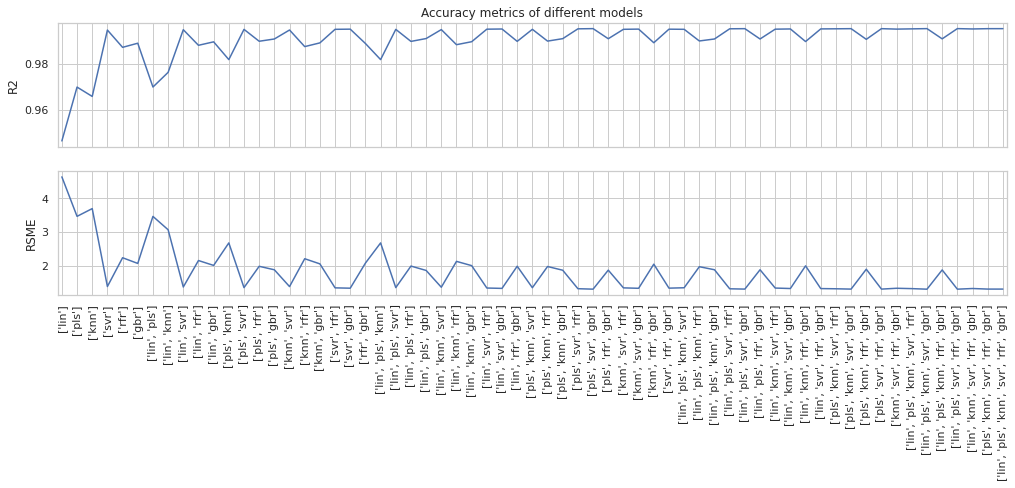

In [34]:
x = ensemble_res['models']
fig, axs = plt.subplots(2,1, figsize=(17,5))
axs[0].plot(x, ensemble_res['r2'], label='r2')
axs[1].plot(x, ensemble_res['RSME'], label='RSME')
axs[0].set_xlim(-0.25, len(x)-0.75)
axs[1].set_xlim(-0.25, len(x)-0.75)
axs[0].set_xticklabels([])
axs[1].set_xticklabels(x, rotation='vertical')
axs[0].set_title('Accuracy metrics of different models')
axs[0].set_ylabel('R2')
axs[1].set_ylabel('RSME')

Many models provide similar accuracy. Slightly improved performance was obtained with the Stacking Regressor but at the cost of longer training and calculation time. If accuracy plays dominant role Stacking Regressor should be chosen, otherwise SVR provides result on a similar level. Moreover, different final estimators (alpha regularization value or models) could be tried to further boost accuracy. Finally, hyper parameters of estimators were obtained in a grid search of the standalone models. It may be the case that other parameter values work better for the stacking regressor.